<a href="https://colab.research.google.com/github/IMHOSUNG/Keras_Study/blob/master/KerasExample1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 손글씨 데이터 셋 MNIST를 다층 퍼셉트론 신경망 모델 학습

## MNIST 데이터 셋 분석

### Keras Setting

In [0]:

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import keras


### 데이터 셋 전처리

In [0]:


np.random.seed(3)

(x_train, y_train) , (x_test, y_test) = mnist.load_data()

x_val = x_train[50000:]
y_val = y_train[50000:]

x_train = x_train[:50000]
y_train = y_train[:50000]

x_train = x_train.reshape(50000, 784).astype('float32') / 255.0
x_val = x_val.reshape(10000, 784).astype('float32')  / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)

x_train = x_train[train_rand_idxs]
y_train = y_train[train_rand_idxs]
x_val = x_val[val_rand_idxs]
y_val = y_val[val_rand_idxs]

y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)


### 모델 구성하기

In [0]:
model = Sequential()
model.add(Dense(units=64, input_dim = 28*28, activation = 'relu'))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd' , metrics=['accuracy'])



### 학습 과정 살펴보기-1 (케라스의 히스토리 기능)

In [0]:
hist = model.fit(x_train, y_train, epochs = 1000, batch_size=32, validation_data=(x_val, y_val))


%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### 모델 구조 알기

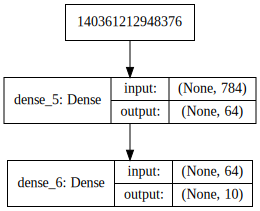

In [0]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

### 모델 평가하기

In [0]:
loss_and_metrics=model.evaluate(x_test,y_test, batch_size=32)

print('')
print('loss_and_metrics : ' + str(loss_and_metrics))

10000/10000 [==============================] - 0s 38us/step

loss_and_metrics : [0.4778219623491168, 0.8785]


### 모델 저장하기, 모델 불러오기
#### 모델 저장하기

In [0]:
from keras.models import load_model
model.save('mnist_mlp_model.h5')

#### 모델 불러오기 및 사용하기

In [0]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

testCount = 10
(x_train, y_train) , (x_test, y_test) = mnist.load_data()
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_test = np_utils.to_categorical(y_test)
xhat_idx = np.random.choice(x_test.shape[0],testCount)
xhat = x_test[xhat_idx]

from keras.models import load_model
model = load_model('mnist_mlp_model.h5')

yhat = model.predict_classes(xhat)

for i in range(testCount) :
  print('Anwser : ' + str(argmax(y_test[xhat_idx[i]])) + ', Predict : ' + str(yhat[i]))

Anwser : 0, Predict : 0
Anwser : 0, Predict : 0
Anwser : 8, Predict : 8
Anwser : 4, Predict : 5
Anwser : 9, Predict : 9
Anwser : 6, Predict : 6
Anwser : 6, Predict : 6
Anwser : 8, Predict : 8
Anwser : 1, Predict : 1
Anwser : 9, Predict : 9
